## Context
 A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499 USD is 999 USD on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.
## Objective 
 The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.

### 1 Data Analytics


In [1]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatter
import pandas
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
# load dataset
df = pd.read_csv("C:/Users/admin/Desktop/Data and ML/Superstore Marketing Campaign/data/superstore_data.csv ")
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

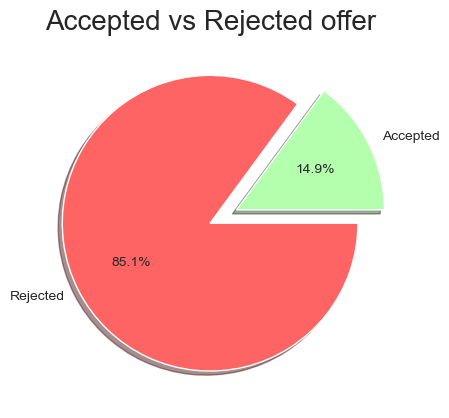

In [4]:

accepted_group = df[df['Response'] == 1]
rejected_group = df[df['Response'] == 0]

y = [len(accepted_group), len(rejected_group)]
colors = ['#B3FFAE', '#FF6464']
labels = ['Accepted', 'Rejected']
myexplode = [0.2, 0]

plt.title("Accepted vs Rejected offer", size=20) 
plt.pie(y, labels=labels, colors=colors, explode=myexplode, autopct='%1.1f%%', shadow=True)
plt.show()



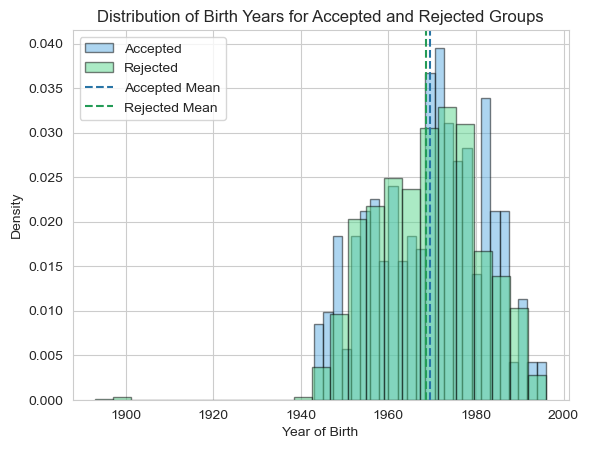

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming accepted_group and rejected_group are already defined
accepted_birth_year = accepted_group['Year_Birth']
rejected_birth_year = rejected_group['Year_Birth']

accepted_birth_year_mean = np.mean(accepted_birth_year)
rejected_birth_year_mean = np.mean(rejected_birth_year)

bins = 25

# Plotting histograms
plt.hist(accepted_birth_year, bins=bins, alpha=0.5, label='Accepted', density=True, color='#5DADE2', edgecolor='black')
plt.hist(rejected_birth_year, bins=bins, alpha=0.5, label='Rejected', density=True, color='#58D68D', edgecolor='black')

# Plotting vertical lines for means
plt.axvline(x=accepted_birth_year_mean, color='#2874A6', linestyle='dashed', linewidth=1.5, label='Accepted Mean')
plt.axvline(x=rejected_birth_year_mean, color='#239B56', linestyle='dashed', linewidth=1.5, label='Rejected Mean')

# Adding labels, legend, and title
plt.legend(loc='upper left')
plt.xlabel('Year of Birth')
plt.ylabel('Density')
plt.title('Distribution of Birth Years for Accepted and Rejected Groups')

# Show plot
plt.show()


In [6]:
print(accepted_birth_year_mean)
print(rejected_birth_year_mean)

1969.4161676646706
1968.6988457502623


As we see from two overlapping histograms have a bell shape and means plotted inform us that the customer's decision doesn't really depends on births year.

In [7]:
# test for graduation level

accepted_education = accepted_group['Education']
rejected_education = rejected_group['Education']

labels = accepted_education.unique()
sizes_accepted = []
sizes_rejected = []
for label in labels:
    sizes_accepted.append(accepted_education.value_counts()[label])
    sizes_rejected.append(rejected_education.value_counts()[label])

print(sizes_accepted)
print(sizes_rejected)

colors = ['#3C9D4E', '#7031AC', '#C94D6D', '#E4BF58', '#4174C9']   


[152, 101, 22, 57, 2]
[975, 385, 181, 313, 52]


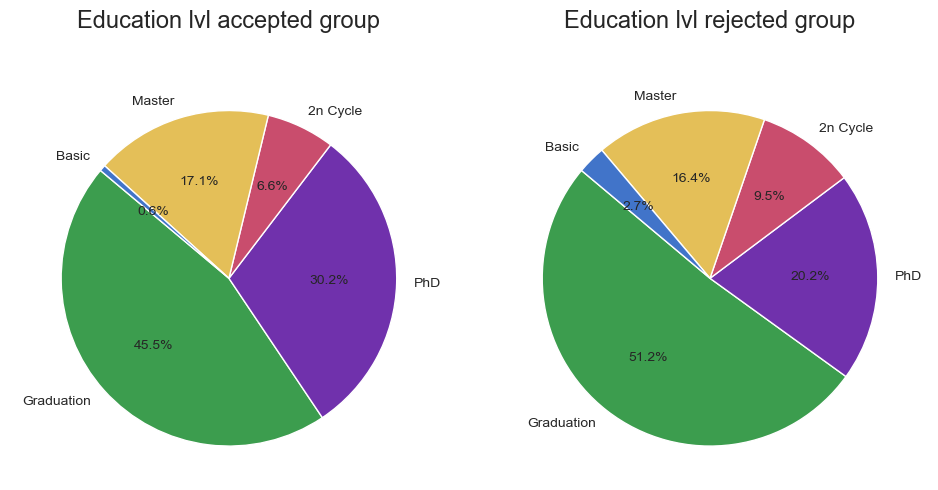

In [8]:
# Data for the first pie chart
labels1 = labels
sizes1 = sizes_accepted
colors1 = colors

# Data for the second pie chart
labels2 = labels
sizes2 = sizes_rejected
colors2 = colors

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First pie chart
ax1.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=140)
ax1.set_title('Education lvl accepted group', fontsize=17, pad=35)

# Second pie chart
ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=140)
ax2.set_title('Education lvl rejected group', fontsize=17, pad=35)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')
ax2.axis('equal')

# Display the plots
plt.tight_layout()
plt.show()


As we se from the pie charts above all variables except two don't vary too much. We now know that those who have "Graduation" are 5% likely will not buy the membership and those who have PhD degree are exactly 10% to accept the offer from the Superstore. From this we are likely achive sucess if we call people with PhD degrees.


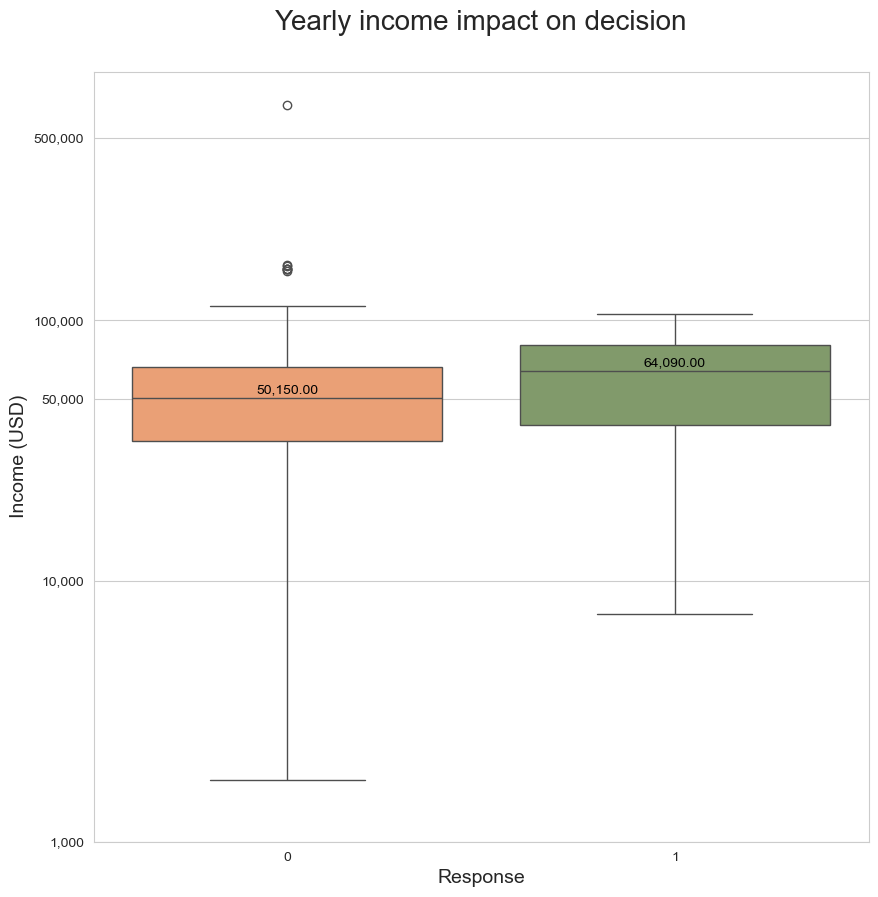

In [9]:
# Creating the box plot# Plotting
plt.figure(figsize=(10, 10))
palette = ['#FD9B63', '#81A263']
boxplot = sns.boxplot(x='Response', y='Income', hue='Response', legend=False, data=df, palette=palette)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Customizing y-axis ticks for better readability
ticks = [1000, 10000, 50000, 100000, 500000]  # Define your own meaningful ticks
plt.yticks(ticks, [f'{tick:,}' for tick in ticks])  # Format ticks as comma-separated numbers

# Calculate medians and annotate them
medians = df.groupby(['Response'])['Income'].median()
vertical_offset = df['Income'].median() * 0.05  # offset from median for display

for xtick in boxplot.get_xticks():
    plt.text(xtick, medians[xtick] + vertical_offset, f'{medians[xtick]:,.2f}',
             horizontalalignment='center', color='black')

plt.title('Yearly income impact on decision', fontsize=20, pad=30)
plt.xlabel('Response', size=14)
plt.ylabel('Income (USD)', size=14)
plt.show()

Our analysis indicates that, despite a few outliers with high yearly incomes in the rejected group, there is a noticeably higher median salary among individuals who accepted the offer—around $\$16,000 more. Additionally, the box plot suggests that we are 1.5 to 2 times more likely to receive a positive response when we contact people with a yearly income of $\$50,000 or higher.

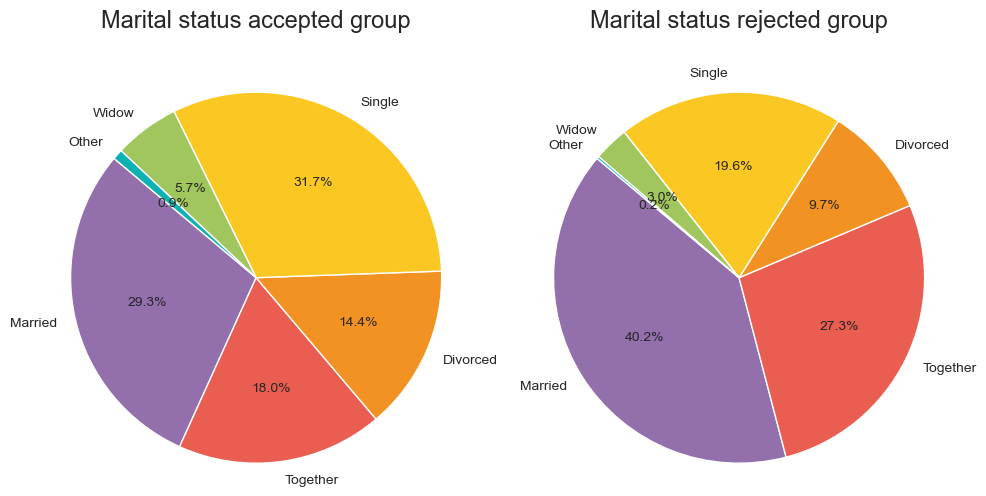

In [10]:
# now we check for marital status of each group

accepted_marital = accepted_group['Marital_Status']
rejected_marital = rejected_group['Marital_Status']

accepted_marital_status = accepted_marital.copy()
rejected_marital_status = rejected_marital.copy()

accepted_marital_status.replace('YOLO', 'Other', inplace=True)
rejected_marital_status.replace('YOLO', 'Other', inplace=True)

accepted_marital_status.replace('Absurd', 'Other', inplace=True)
rejected_marital_status.replace('Absurd', 'Other', inplace=True)

accepted_marital_status.replace('Alone', 'Other', inplace=True)
rejected_marital_status.replace('Alone', 'Other', inplace=True)

labels = rejected_marital_status.unique()

sizes_accepted = []
sizes_rejected = []

for label in labels:
    sizes_accepted.append(accepted_marital_status.value_counts()[label])
    sizes_rejected.append(rejected_marital_status.value_counts()[label])

colors = ['#936fac', '#e95e50', '#f29222', '#fac723', '#a1c65d', '#0cb2af']

# Data for the first pie chart
labels1 = labels
sizes1 = sizes_accepted
colors1 = colors

# Data for the second pie chart
labels2 = labels
sizes2 = sizes_rejected
colors2 = colors

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First pie chart
ax1.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=140)
ax1.set_title('Marital status accepted group', fontsize=17, pad=35)

# Second pie chart
ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=140)
ax2.set_title('Marital status rejected group', fontsize=17, pad=35)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')
ax2.axis('equal')

# Display the plots
plt.tight_layout()
plt.show()

  

Our research revealed that single individuals are about 10% more likely to accept the offer, while widows are about 3% more likely. On the other hand, those who are married or in a partnership are approximately 10% more likely to decline the offer. Based on these findings, our marketing campaigns would benefit from focusing more on single individuals and widows to optimize engagement and response rates.

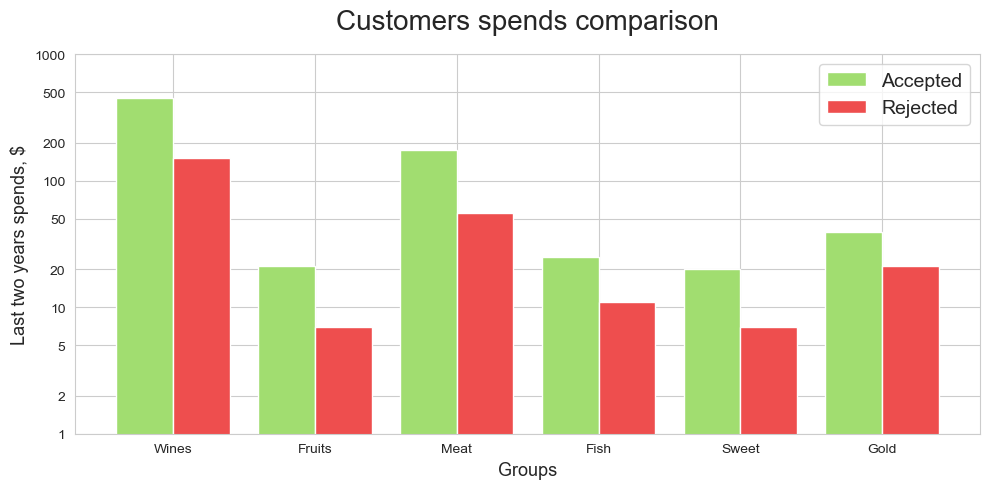

In [11]:
import matplotlib.ticker as ticker

labes_df = list(df.columns)
# print(labes_df)

purchase_labels = []
for label in labes_df:
    if 'Mnt' in label:
        purchase_labels.append(label)

# print(purchase_labels)

mnt_product_accepted = accepted_group[purchase_labels]
mnt_poduct_rejected = rejected_group[purchase_labels]

new_column_names = ['MntWines', 'MntFruits', 'MntMeat', 'MntFish', 'MntSweet', 'MntGold']
new_column_names = [name.replace('Mnt', '') for name in new_column_names]


mnt_product_accepted.columns = new_column_names
mnt_poduct_rejected.columns = new_column_names

# data for the first subplot
spend_sizes_accepted = []

# data for the second subplot
spend_sizes_rejected = []

for label in new_column_names:
    spend_sizes_accepted.append(np.median(mnt_product_accepted[label]))
    spend_sizes_rejected.append(np.median(mnt_poduct_rejected[label]))

X = new_column_names
Y_accepted = spend_sizes_accepted
Y_rejected = spend_sizes_rejected

X_axis = np.arange(len(X))

plt.figure(figsize=(10, 5))
plt.bar(X_axis - 0.2, Y_accepted, 0.4, label='Accepted', color='#A1DD70')
plt.bar(X_axis + 0.2, Y_rejected, 0.4, label='Rejected', color='#EE4E4E')

plt.xticks(X_axis, new_column_names)

plt.xlabel("Groups", fontsize=13)
plt.ylabel("Last two years spends, $", fontsize=13)
plt.title("Customers spends comparison", fontsize=20, pad=18)
plt.legend(fontsize=14)

# Setting log scale
plt.yscale('log')
y_ticks_lst = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# Custom formatter function
def custom_formatter(x, pos):
    if x in y_ticks_lst:
        return str(int(x))
    else:
        return ''

# Applying custom formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

# Manually setting the y-ticks
plt.yticks(y_ticks_lst)

plt.tight_layout()
plt.show()



From the bar plot, it's evident that customers who accepted the offer generally spent more on all types of products compared to those who declined. The difference in spending isn't significant for products like Fruits, Fish, Sweets, and Gold, ranging only between $\$13 to $\$20. However, a more substantial difference is observed in the spending on Meat and Wines, where the discrepancies are about $\$150 and $\$350, respectively. These insights suggest that our focus should particularly be on understanding the preferences and behaviors of customers who spend more on Meat and Wines.


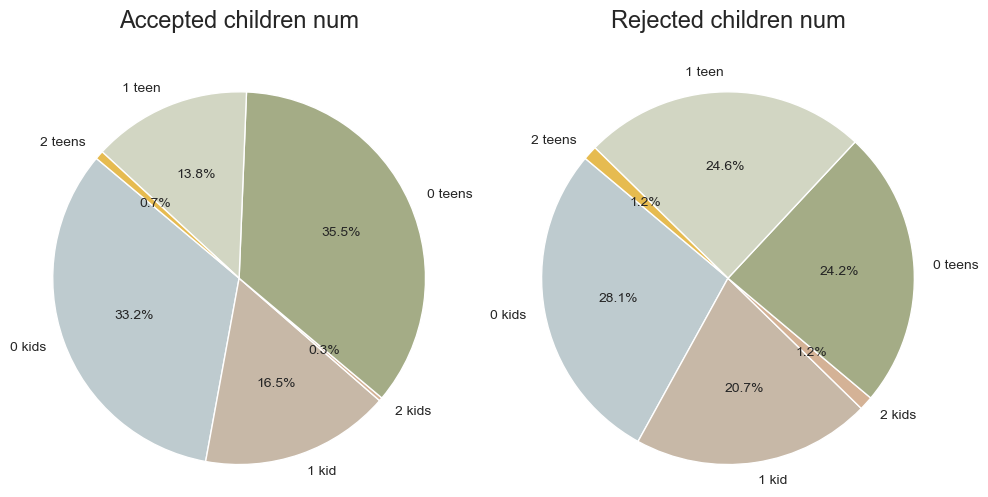

In [12]:
accepted_group_kids = accepted_group["Kidhome"]
rejected_group_kids = rejected_group["Kidhome"]

accepted_group_teens = accepted_group["Teenhome"]
rejected_group_teens = rejected_group["Teenhome"]

labels = ["0 kids", "1 kid", "2 kids", "0 teens", "1 teen", "2 teens"]

sizes_accepted = []

for i in range(0, 3):
    sizes_accepted.append(accepted_group_kids.value_counts()[i])

for i in range(0, 3):
    sizes_accepted.append(accepted_group_teens.value_counts()[i])

sizes_rejected = []

for i in range(0, 3):
    sizes_rejected.append(rejected_group_kids.value_counts()[i])

for i in range(0, 3):
    sizes_rejected.append(rejected_group_teens.value_counts()[i])


colors = ['#becbcf', '#c7b8a7', '#d4b296', '#a4ac86', '#d2d6c3', '#e6bb50']
# print(sizes_accepted, sizes_rejected)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First pie chart
ax1.pie(sizes_accepted, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax1.set_title('Accepted children num', fontsize=17, pad=35)

# Second pie chart
ax2.pie(sizes_rejected, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax2.set_title('Rejected children num', fontsize=17, pad=35)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')
ax2.axis('equal')

# Display the plots
plt.tight_layout()
plt.show()


The pie charts illustrate that individuals with no children or teenagers are 5% and 10% more likely to accept the proposal, respectively. On the other hand, families with one teenager are about 11% more likely to reject the offer, and those with one child are approximately 4% more likely to decline.

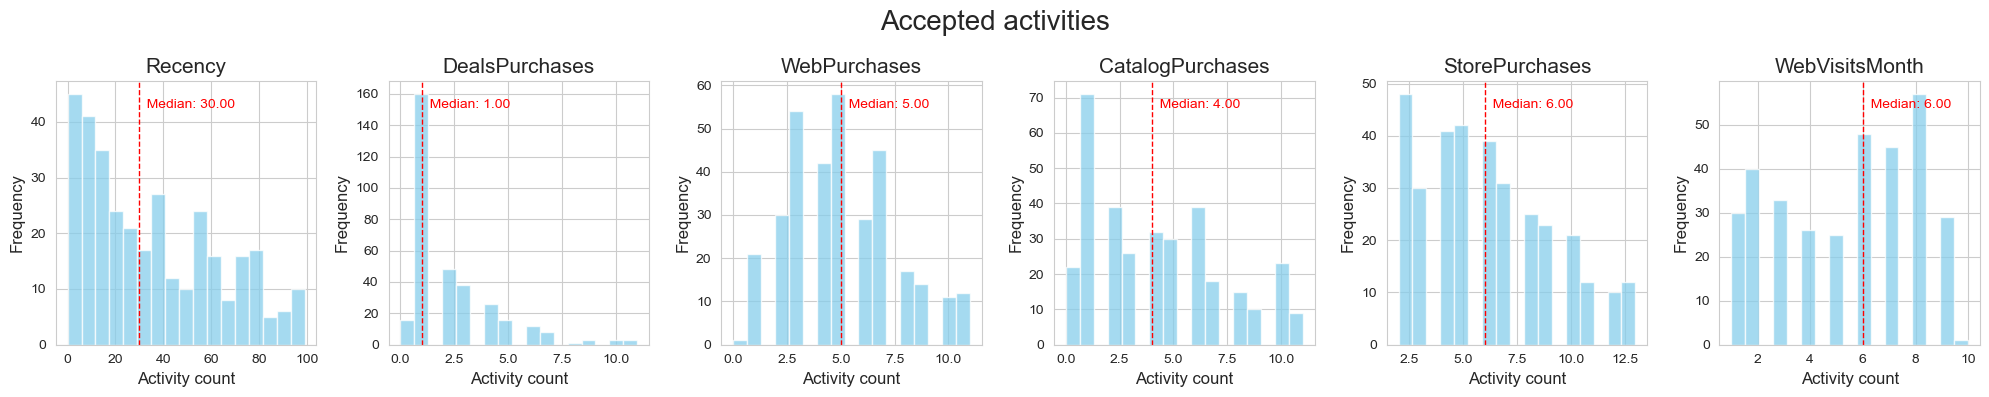

In [13]:
target_columns = []
target_columns.append('Recency')

for name in df.columns:
    if 'Num' in name:
        target_columns.append(name)
   
     
accepted_activity = accepted_group[target_columns]
rejected_activity = rejected_group[target_columns]

target_columns = [name.replace('Num', '') for name in target_columns]
# target_columns.append('Recency')

rejected_activity.columns = target_columns
accepted_activity.columns = target_columns

columns_to_investigate = target_columns

# Plotting distributions of each variable specified in the list in a single image
fig, axes = plt.subplots(1, len(columns_to_investigate), figsize=(20, 4))

for i, column in enumerate(columns_to_investigate):
    axes[i].hist(accepted_activity[column], bins=17, alpha=0.75, color='skyblue')
    
    # Calculate and plot median
    median_value = accepted_activity[column].median()
    axes[i].axvline(median_value, color='red', linestyle='dashed', linewidth=1)
    
    # Annotate the median value on the plot
    axes[i].text(median_value, axes[i].get_ylim()[1] * 0.9, f'  Median: {median_value:.2f}', color='red')
    
    axes[i].set_title(column, fontsize=15)
    axes[i].set_xlabel('Activity count', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

fig.suptitle('Accepted activities', fontsize=20)
plt.tight_layout()
plt.show()
    
    
    
    
    

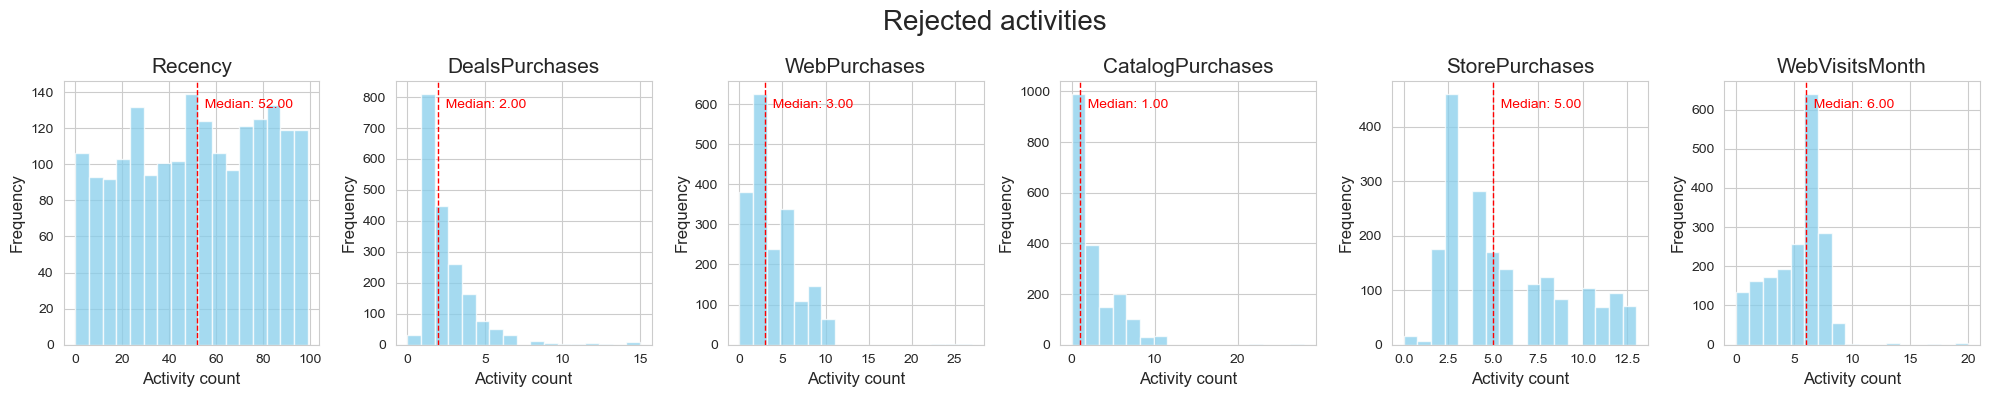

In [14]:
columns_to_investigate = target_columns

# Plotting distributions of each variable specified in the list in a single image
fig, axes = plt.subplots(1, len(columns_to_investigate), figsize=(20, 4))

for i, column in enumerate(columns_to_investigate):
    axes[i].hist(rejected_activity[column], bins=17, alpha=0.75, color='skyblue')
    
    # Calculate and plot median
    median_value = rejected_activity[column].median()
    axes[i].axvline(median_value, color='red', linestyle='dashed', linewidth=1)
    
    # Annotate the median value on the plot
    axes[i].text(median_value, axes[i].get_ylim()[1] * 0.9, f'  Median: {median_value:.2f}', color='red')
    
    axes[i].set_title(column, fontsize=15)
    axes[i].set_xlabel('Activity count', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

fig.suptitle('Rejected activities', fontsize=20)
plt.tight_layout()
plt.show()


Analyzing the distribitions of customers activity we notice that there is a trend in all distribution's medians that customers who aggreed to buy membership have bigger activity in everything ecxept for buying stuff using discounts. Especially, if we take a look at 
such distributions as "WebPurchases" and "CatalogPurchases". The median differences are 2 and 3 respectively. Also, it was predictable that recency would be higher in accepted group, where we have a right-skewed plot, which means that people tend to buy things more recent. The distribution of the opposite group is uniform

In [15]:
contingency_table = pd.crosstab(df.Complain, df.Response)
print("Contingency Table:\n", contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Step 3: Interpret the Results
if p < 0.05:
    print("There is a statistically significant association between 'complain' and 'response'.")
else:
    print("There is no statistically significant association between 'complain' and 'response'.")

Contingency Table:
 Response     0    1
Complain           
0         1888  331
1           18    3
Chi-Square Statistic: 0.0000
P-Value: 1.0000
Degrees of Freedom: 1
Expected Frequencies:
[[1888.13125  330.86875]
 [  17.86875    3.13125]]
There is no statistically significant association between 'complain' and 'response'.


In [16]:
date_response = df[["Dt_Customer", "Response"]]
date_response

date_response['Dt_Customer'] = date_response['Dt_Customer'].apply(lambda x: int(str(x)[-4:]))
date_response


C:\Users\admin\AppData\Local\Temp\ipykernel_27760\2537458978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_response['Dt_Customer'] = date_response['Dt_Customer'].apply(lambda x: int(str(x)[-4:]))


,Dt_Customer,Response
0,2014,1
1,2014,1
2,2014,0
3,2014,0
4,2014,1
...,...,...
2235,2013,0
2236,2013,0
2237,2012,0
2238,2012,0


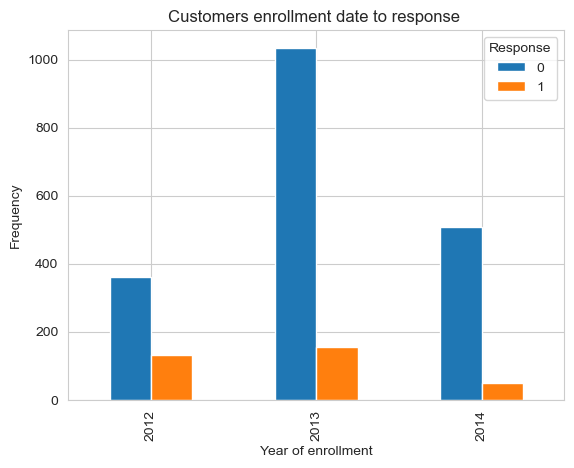

In [17]:
pd.crosstab(date_response.Dt_Customer, date_response.Response).plot(kind='bar')
plt.title('Customers enrollment date to response ')
plt.xlabel('Year of enrollment')
plt.ylabel('Frequency')
plt.savefig('pur_dayofweek_bar')

### 2. Building a prediction model

In [18]:

# Encoding the Categorical variables
cat_variables = ['Education', 'Marital_Status']

label_encoder = LabelEncoder()
for cat_variable in cat_variables:
    df[cat_variable] = label_encoder.fit_transform(df[cat_variable])

# estimating Dt_Customer variable
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: int(str(x)[-4:]))


# Select features and target
X = df[
    ['Year_Birth','Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
     'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']] 

# adjust the feature names
y = df['Response']  # the target variable

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')


# Fit on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [19]:
# copy of the cell above

# Encoding the Categorical variables
cat_variables = ['Education', 'Marital_Status']

label_encoder = LabelEncoder()
for cat_variable in cat_variables:
    df[cat_variable] = label_encoder.fit_transform(df[cat_variable])

# estimating Dt_Customer variable
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: int(str(x)[-4:]))


# Select features and target
X = df[
    ['Year_Birth','Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
     'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']] 

# adjust the feature names
y = df['Response']  # the target variable

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')


# Fit on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [20]:

# Create the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Accuracy: 0.84375
Confusion Matrix:
 [[358  18]
 [ 52  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       376
           1       0.53      0.28      0.36        72

    accuracy                           0.84       448
   macro avg       0.70      0.61      0.64       448
weighted avg       0.82      0.84      0.82       448



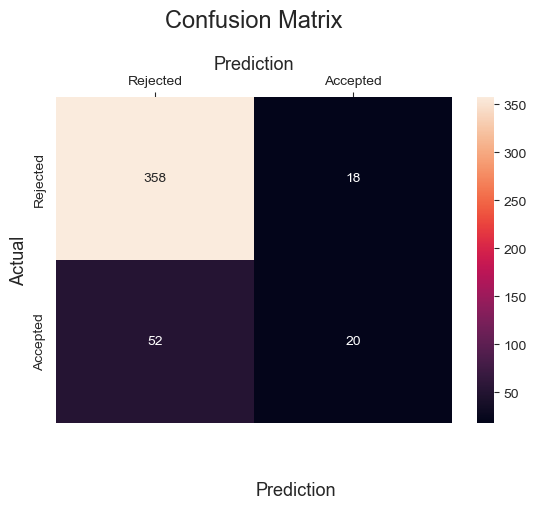

In [21]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Rejected','Accepted'],
            yticklabels=['Rejected','Accepted'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [22]:
# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train_imputed, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test_imputed)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8571428571428571
Gradient Boosting Confusion Matrix:
 [[357  19]
 [ 45  27]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       376
           1       0.59      0.38      0.46        72

    accuracy                           0.86       448
   macro avg       0.74      0.66      0.69       448
weighted avg       0.84      0.86      0.84       448



In [23]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}

from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)
# gbm = GradientBoostingClassifier(random_state=42, class_weights={0: 1, 1: 5})

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train_imputed, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_imputed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 200}
Best cross-validation score: 0.87
Accuracy: 0.8660714285714286
Confusion Matrix:
 [[356  20]
 [ 40  32]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       376
           1       0.62      0.44      0.52        72

    accuracy                           0.87       448
   macro avg       0.76      0.70      0.72       448
weighted avg       0.85      0.87      0.86       448



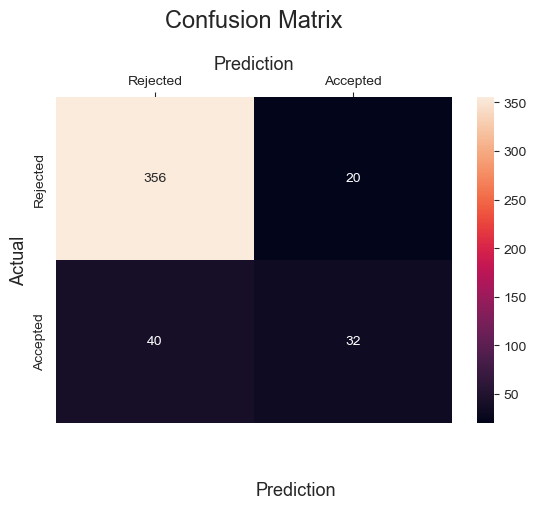

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Rejected','Accepted'],
            yticklabels=['Rejected','Accepted'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [25]:
import xgboost as xgb

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_imputed, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_imputed)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.84375
XGBoost Confusion Matrix:
 [[348  28]
 [ 42  30]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       376
           1       0.52      0.42      0.46        72

    accuracy                           0.84       448
   macro avg       0.70      0.67      0.69       448
weighted avg       0.83      0.84      0.84       448



C:\Users\admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:10:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


C:\Users\admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 262, number of negative: 1530
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 1792, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146205 -> initscore=-1.764679
[LightGBM] [Info] Start training from score -1.764679
LightGBM Accuracy: 0.8370535714285714
LightGBM Accuracy: 0.8370535714285714
LightGBM Confusion Matrix:
 [[337  39]
 [ 34  38]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       376
           1       0.49      0.53      0.51        72

    accuracy                           0.84       448
   macro avg       0.70      0.71      0.71       448
weighted avg       0.84      0.84      0.84    

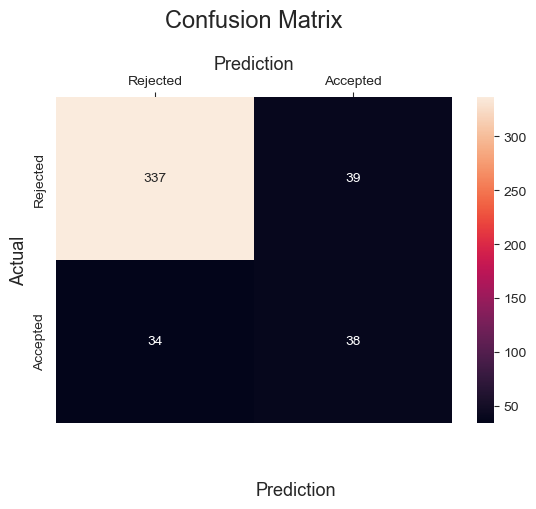

In [26]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize LightGBM Classifier
lgb_model = lgb.LGBMClassifier(is_unbalance=True)
# Train the model
lgb_model.fit(X_train_imputed, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test_imputed)
# Evaluation
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("LightGBM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Rejected','Accepted'],
            yticklabels=['Rejected','Accepted'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [31, 41, 51],  # More leaves can increase accuracy but may lead to overfitting
    'max_depth': [3, 5, 7],
    'min_data_in_leaf': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1]
}

lgb_model = lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train_imputed, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
y_pred_lgb_best = best_model.predict(X_test_imputed)
print("Improved Accuracy:", accuracy_score(y_test, y_pred_lgb_best))
print("Improved Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb_best))
print(classification_report(y_test, y_pred_lgb_best))

cm = confusion_matrix(y_test, y_pred_lgb_best)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Rejected','Accepted'],
            yticklabels=['Rejected','Accepted'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


NameError: name 'scale_pos_weight' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Calculate the ratio for LightGBM
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('lgb', lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42))
]

# Final meta-learner model
final_estimator = LogisticRegression()

# Stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)

# Fit the stacking classifier
stacking_clf.fit(X_train_imputed, y_train)

# Predictions
y_pred_stack = stacking_clf.predict(X_test_imputed)

# Evaluation
print("Stacking Ensemble Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Ensemble Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))


[LightGBM] [Info] Number of positive: 205, number of negative: 1228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1480
[LightGBM] [Info] Number of data points in the train set: 1433, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143057 -> initscore=-1.790132
[LightGBM] [Info] Start training from score -1.790132
Blended Model Accuracy: 0.8102678571428571
Blended Model Confusion Matrix:
 [[312  64]
 [ 21  51]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       376
           1       0.44      0.71      0.55        72

    accuracy                           0.81       448
   macro avg       0.69      0.77      0.71       448
weighted avg       0.86      0.81      0.83       448



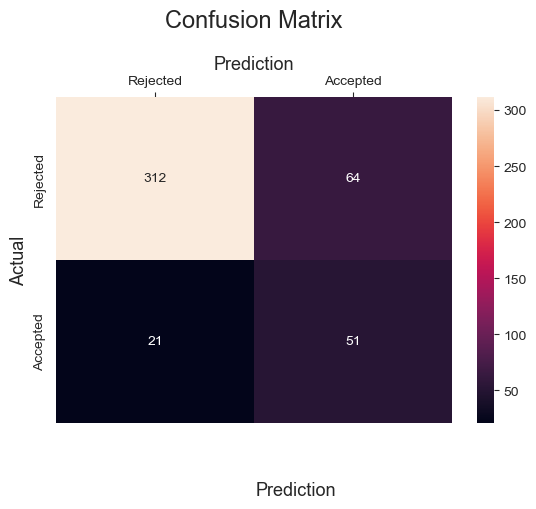

In [28]:
from sklearn.model_selection import train_test_split

# Splitting the training set into training and validation sets
X_train_blend, X_val_blend, y_train_blend, y_val_blend = train_test_split(
    X_train_imputed, y_train, test_size=0.2, random_state=42)

# Calculate the ratio for LightGBM
scale_pos_weight = y_train_blend.value_counts()[0] / y_train_blend.value_counts()[1]

# Base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
lgb_model = lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# # Manual adjustment of class weights
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 3})
# lgb_model = lgb.LGBMClassifier(scale_pos_weight=1.5, random_state=42)  # Less aggressive weighting

# Fit models
rf_model.fit(X_train_blend, y_train_blend)
lgb_model.fit(X_train_blend, y_train_blend)

# Predict on validation set
rf_val_pred = rf_model.predict_proba(X_val_blend)[:, 1]
lgb_val_pred = lgb_model.predict_proba(X_val_blend)[:, 1]

# Blend predictions
blended_val_pred = (rf_val_pred + lgb_val_pred) / 2

# Train final logistic regression model on blended predictions
final_model = LogisticRegression(class_weight='balanced')
final_model.fit(blended_val_pred.reshape(-1, 1), y_val_blend)

# Use base models to predict on test set
rf_test_pred = rf_model.predict_proba(X_test_imputed)[:, 1]
lgb_test_pred = lgb_model.predict_proba(X_test_imputed)[:, 1]

# Blend test predictions
blended_test_pred = (rf_test_pred + lgb_test_pred) / 2

# Final predictions from logistic regression model
final_predictions = final_model.predict(blended_test_pred.reshape(-1, 1))

# Evaluation
print("Blended Model Accuracy:", accuracy_score(y_test, final_predictions))
print("Blended Model Confusion Matrix:\n", confusion_matrix(y_test, final_predictions))
print(classification_report(y_test, final_predictions))


cm = confusion_matrix(y_test, final_predictions)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Rejected','Accepted'],
            yticklabels=['Rejected','Accepted'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

As we can see now, that our last model is the the greatest one in case of prediction percentages:
*  Postive class ~ 71% accuracy
* Postive class ~ 83% accuracy

We have worse results in positive class prediction due to highly imbalaneced dataset: only 15% are instances of positive class

